In [1]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
with open('/content/drive/MyDrive/TFM-MUECIM/LabelsFreqs.dat','rb') as fd:
    lf = pickle.load(fd)

lfKeys = lf.keys()

lfSortedKeys = sorted(lf, key = lf.get, reverse = True)

lfOrdered = []
for lfKey in lfSortedKeys:
    lfOrdered.append(lf.get(lfKey))


In [7]:
import matplotlib.pyplot as mp

In [8]:
x = [i for i in range(len(lfOrdered))]

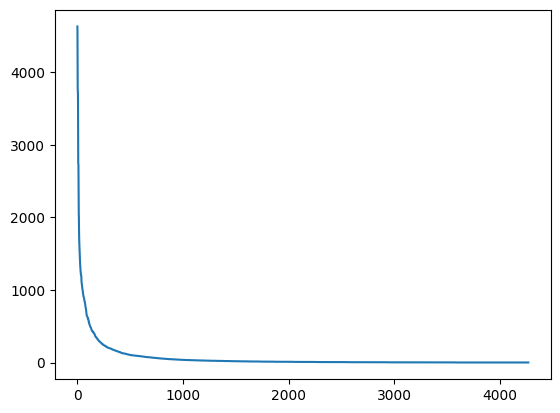

In [9]:
mp.plot(x,lfOrdered)

50 50


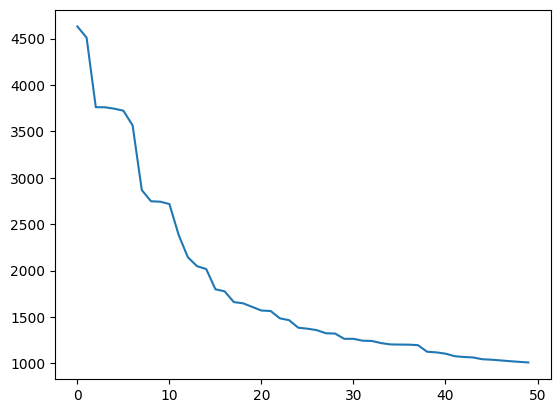

In [10]:
x50 = [i for i in range(50)]
y50 = lfOrdered[0:50]
print(len(x50), len(y50))
mp.plot(x50, y50)

50 50


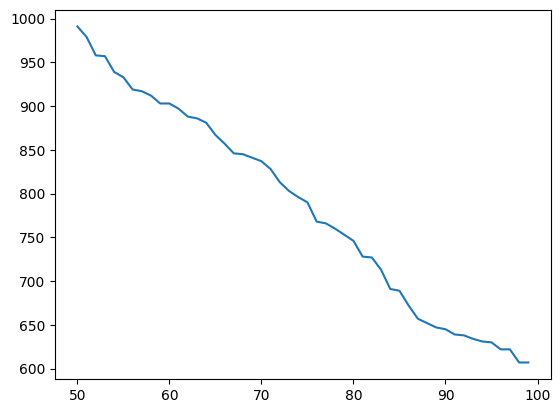

In [11]:
x50_100 = [i for i in range(50,100)]
y50_100 = lfOrdered[50:100]
print(len(x50_100), len(y50_100))
mp.plot(x50_100, y50_100)

50 50


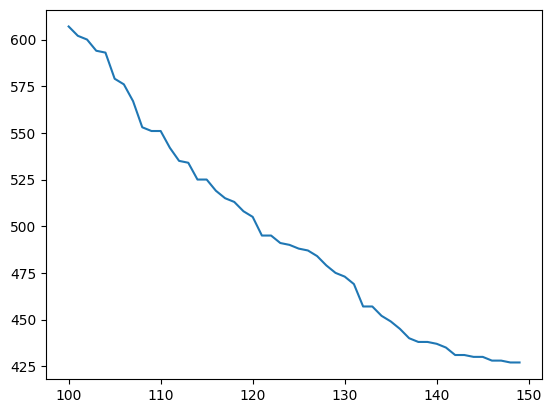

In [12]:
x100_150 = [i for i in range(100,150)]
y100_150 = lfOrdered[100:150]
print(len(x100_150), len(y100_150))
mp.plot(x100_150, y100_150)

In [14]:
with open('/content/drive/MyDrive/TFM-MUECIM/50LabelsLabelSet.dat','wb') as fd50labels:
    pickle.dump(lfSortedKeys[50:100], fd50labels)


In [15]:
with open('/content/drive/MyDrive/TFM-MUECIM/FilesPerLabel.dat', 'rb') as fpld:
    fpl = pickle.load(fpld)


In [16]:
fileIndexes = []
for labelKey in lfSortedKeys[50:100]:
    filesPerLabel = fpl.get(labelKey)
    for filePerLabel in filesPerLabel:
        if filePerLabel not in fileIndexes:
            fileIndexes.append(filePerLabel)


In [17]:
with open('/content/drive/MyDrive/TFM-MUECIM/FilesIndex.txt','r') as fiFd:
    fiBase = fiFd.readlines()


In [18]:
k = 0
with open('/content/drive/MyDrive/TFM-MUECIM/50LabelsLabelSetFileIndex.txt', 'w') as fd50labelsFileIndex:
    for fileIndex in fileIndexes:
        line = fiBase[fileIndex]
        tokens = line.split(',');
        fd50labelsFileIndex.write(f'{k},{tokens[1]}')
        k += 1


In [20]:
# 50LabelsLabelSetIx2Label.dat
# 50LabelsLabelSetLabel2Ix.dat

k = 0
index2Label = {}
label2Index = {}
for labelKey in lfSortedKeys[50:100]:
    index2Label[k] = labelKey
    label2Index[labelKey] = k
    k += 1

with open('/content/drive/MyDrive/TFM-MUECIM/50LabelsLabelSetIx2Label.dat','wb') as i2lFd:
     pickle.dump(index2Label, i2lFd)

with open('/content/drive/MyDrive/TFM-MUECIM/50LabelsLabelSetLabel2Ix.dat','wb') as l2iFd:
     pickle.dump(label2Index, l2iFd)
